# 선형 회귀 모델

선형 회귀 모델이란 데이터의 분포를 선형적으로 적합시키는 모델.


# 와인 데이터를 이용해 품질 예측

와인의 품질에 어떠한 영향을 미치는지 알 수 있다. <br>
또한 특징을 이용한 와인의 품질을 예측할 수 있다. <br>

관측값 : 6,497 <br>
입력변수 : 12개  <br>
출력변수 : 1개 (quality : 와인품질평가점수)<br>

# 데이터 프레임 구성

In [24]:
import pandas as pd

# 레드와인 정보
redwine  = pd.read_csv('winequality-red.csv', sep=',', header=0) # header는 0번째 열에 있다.
redwine['type'] = 'red'
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [25]:
# 화이트와인 정보
whitewine  = pd.read_csv('winequality-white.csv', sep=';', header=0) # header는 0번째 열에 있다.
whitewine['type'] = 'white'
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [26]:
# 레드와인 + 화이트와인
wine = redwine.append(whitewine)
wine.shape 

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_2437/3552768720.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine = redwine.append(whitewine)


(6497, 13)

In [27]:
wine.columns = wine.columns.str.replace(' ','_') # Coulmn명에 ' '공백이 있으면, data를 다루기 힘들기 때문에 '-'로 바꿔준다
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# describe() : 연속형 데이터에 대한 요약통계량 

DataFrame객체의 describe() method를 이용한 수치형 변수들의 요약통계량 출려

In [31]:
wine.describe()

# 사분위수(Quartile)
# 25% : Q1 (하위 25%)
# 50% : Q2 (중심부)
# 75% : Q3 (상위 75%)
# 
# 사분위수 범위(IQR) = Q3-Q1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [32]:
wine.quality.describe()  # Series객체의 describe() method를 이용한 수치형 변수의 요약통계 출력

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

# 데이터 분포 확인

In [33]:
sorted(wine.quality.unique()) # quality는 0~10점으로 구성. 하지만 존재하는 실제 값은 아래와 같다.

[3, 4, 5, 6, 7, 8, 9]

In [36]:
wine.quality.value_counts() # 5, 6, 7점 quality의 와인들이 대부분의 분포를 갖고 있다.

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [37]:
wine.groupby("type")["quality"].describe()  # red, white wine별로 나눈 후에 'quality'에 대한 요약 통계량 확인

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [42]:
# 와인 종류별 품질의 사분위수(quantile)
wine.groupby('type')['quality'].quantile([0, 0.25, 0.5, 0.75, 1]).unstack('type') 

# Q1 : 0
# Q2 : 0.25
# ...
# Q5 : 1

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


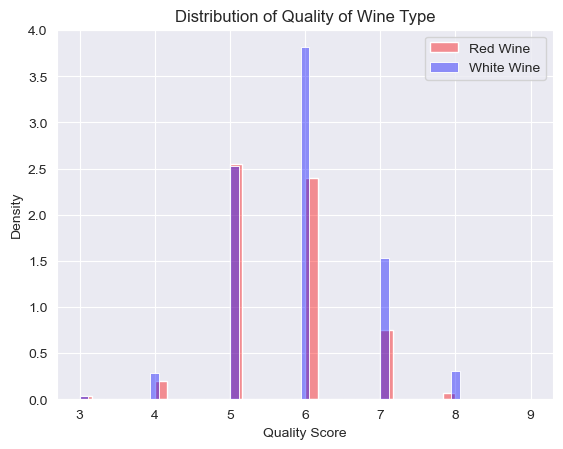

In [52]:
# 와인 종류별 품질의 분포 (히스토그램)
import seaborn as sns
import matplotlib.pyplot as plt

red_q = wine.loc[wine['type'] == 'red', 'quality']
white_q = wine.loc[wine['type'] == 'white', 'quality']

sns.set_style('darkgrid')
sns.histplot(red_q, stat='density', kde=False, color='r', label='Red Wine', alpha=.4)
sns.histplot(white_q, stat='density', kde=False, color='b', label='White Wine', alpha=.4)
plt.title("Distribution of Quality of Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend();

# red, white wine 모두 quality 점수 5, 6, 7에 걸쳐있다.

# 와인 종류별 품질 차이의 통계적 유의성 검정

귀무가설 정의 <br>
-> 표본 추출   <br>
-> 통계적 유의성 있는지? (여러 검정 기법 사용)<br>
-> 귀무가설에 대한 기각 or 채택<br>
<hr>
와인 종류별(red or wine, 모집단 2개) 품질 차이 <br>

2개의 모집단이 있을 때, 품질의 평균 차이?  <br>
-->  <br>
(검증 방법 1) ANOVA : 모집단이 3개 이상일 때 <br>
(검증 방법 2) t-test : 모집단이 2개일 때

따라서 t-test(t 검정)사용.
<hr>

`귀무가설` : `'와인 종류별 품질의 평균 차이는 없다.'` <br>
`p-value > 0.05 ? 평균차이없음(채택) : 평균차이있음(기각)`


In [53]:
# 와인 종류별 품질에 대한 std, mean 구함
wine.groupby('type')['quality'].aggregate(['std', 'mean'])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [56]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
't-stat : {: .3f}, p-value : {: .4f}' .format(t_stat, p_value)

# p-value = 0.0000 
# 0.05보다 작다. 
# 평균 차이 있음 (귀무가설 기각)

't-stat : -9.686, p-value :  0.0000'

# 변수들 사이의 상관분석

R = 상관계수 <br>
-1 <= R <= 1 <br>

R = 0  : 독립적이다 = 상관이 없다<br>
R = 1  : 양의 상관관계가 높다 (x 증가? y 증가)<br>
R = -1 : 음의 상관관계가 높다 (x 증가? y 감소)<br>

In [58]:
wine_corr = wine.corr() # correlation
wine_corr

# 대각선으로 1.0 -> 자기 자신과 

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_2437/1612876167.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_corr = wine.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [60]:
# 양의 상관관계 (correlation이 1에 가까운, 0 초과인)
# quality와 양의 상관관계를 가지는 변수들 
wine_corr.loc[wine_corr['quality'] > 0, 'quality'] 

# 양의 상관관계가 가장 큰 것은 'alcohol' (알코올 도수)

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [61]:
# 음의 상관관계 (correlation이 -1에 가까운, 0 미만인)
# quality와 음의 상관관계를 가지는 변수들 
wine_corr.loc[wine_corr['quality'] < 0, 'quality'] 

# 음의 상관관계가 가장 큰 것은 'density' (밀도)

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

# 산점도 행렬

